### Student Information
Name: 蘇暐中

Student ID: 109020021

GitHub ID: SWCst1020575

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(data_home="~/DM2023-Lab1-Master",subset='train', categories=categories,
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### First part

**Exercise 2**

In [2]:
# print 10th row of data
print(X.iloc[10])
# select target index rows
print(X.loc[[1, 5 ,7]])
# select target rows by category_name from 0~100
print(X[:100][(X['category_name']=="sci.med")[:100]])

text             From: anasaz!karl@anasazi.com (Karl Dussik) Su...
category                                                         3
category_name                               soc.religion.christian
Name: 10, dtype: object
                                                text  category  \
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   

            category_name  
1           comp.graphics  
5  soc.religion.christian  
7                 sci.med  
                                                 text  category category_name
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2       sci.med
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2       sci.med
28  From

**Exercise 5**

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Since 'NaN', 'None', '' are string values, not actual null value. Therefore, the isnull would not work for these cases. We can replace the fake null value to make isnull work.

In [5]:
fakeNull = ['', 'NaN', 'None']
NA_df = NA_df.replace(fakeNull,None)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

**Exercise 6**

In [6]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


1. The row indices of X_sample are not in order.
2. X_sample is a copy of X, which means when we change certain values in X, the corresponding values won't be changed.

**Exercise 8**

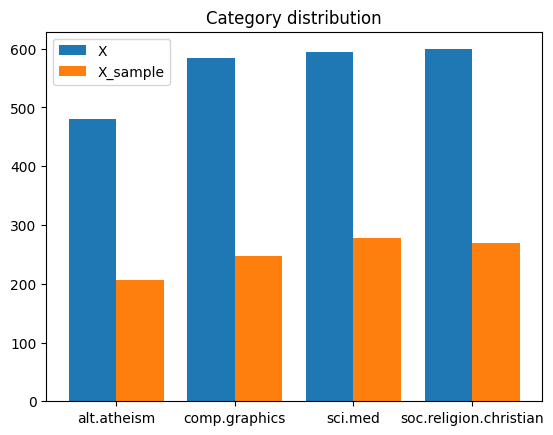

In [7]:
import matplotlib.pyplot as plt
# preserve the order of categories
X_count = X.category_name.value_counts().sort_index()
X_sampleCount = X_sample.category_name.value_counts().sort_index()
categories = X.category_name.value_counts().sort_index().index
X_axis = np.arange(len(categories)) 
# show the plot
plt.bar(X_axis-0.2,X_count,0.4, label = 'X') 
plt.bar(X_axis+0.2,X_sampleCount,0.4, label = 'X_sample') 
plt.xticks(X_axis, categories) 
plt.title("Category distribution") 
plt.legend() 
plt.show() 


**Exercise 10**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [9]:
# Answer here
pos = np.where(X_counts[4:5, 0:100].toarray()[0] == 1)
count_vect.get_feature_names_out()[pos]

array(['00', '01'], dtype=object)

The second 1 represents '01'.

**Exercise 11**

We can find more meaningful data by setting the arguments in the CountVectorizer.

,term_about,term_all,term_an,term_and,term_any,term_are,term_article,term_as,term_at,term_be,...,term_the,term_there,term_this,term_to,term_was,term_what,term_with,term_would,term_writes,term_you
doc_0,0,0,0,0,1,0,0,0,0,0,...,5,0,1,4,0,0,0,1,0,0
doc_1,0,0,0,0,3,0,0,1,0,4,...,11,1,3,4,0,0,0,1,0,0
doc_2,1,0,2,9,1,6,0,0,7,8,...,14,1,14,26,3,2,7,2,0,13
doc_3,1,0,0,1,0,0,0,0,1,0,...,6,0,1,0,0,0,0,0,0,0
doc_4,0,0,0,3,0,2,2,2,1,0,...,10,1,2,8,0,0,0,0,1,1
doc_5,0,2,0,7,0,3,1,3,1,12,...,12,0,2,14,0,1,0,4,1,0
doc_6,1,0,0,7,0,5,1,4,1,3,...,3,0,0,8,0,0,2,1,2,0
doc_7,1,0,3,9,4,3,0,4,2,5,...,21,1,2,11,3,0,5,0,1,0
doc_8,0,0,0,5,0,3,2,0,0,0,...,6,2,1,6,0,1,0,0,1,1
doc_9,6,0,1,23,0,0,0,3,2,1,...,10,2,7,21,16,4,9,0,0,5


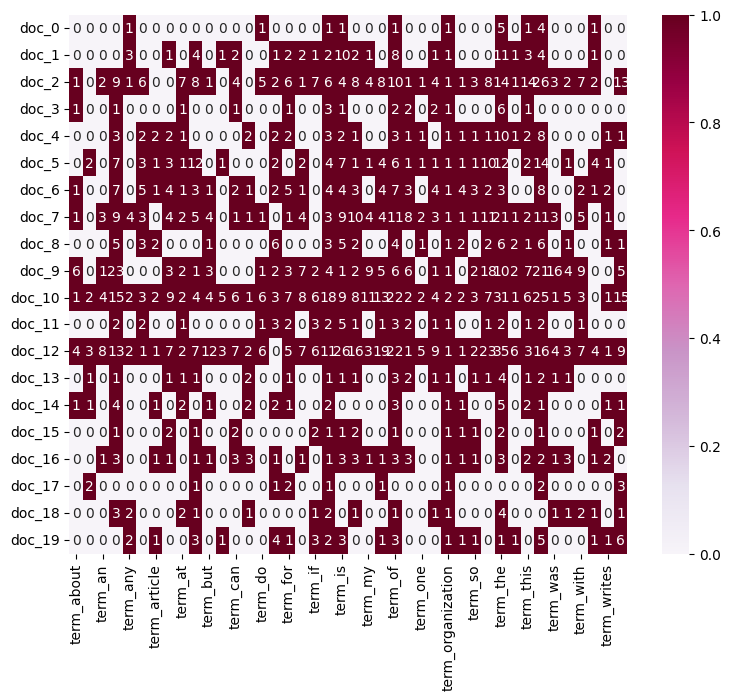

In [10]:
import seaborn as sns
count_vect_2 = CountVectorizer(min_df=0.4, max_df=0.95)
X_counts_2 = count_vect_2.fit_transform(X.text)
plot_x = ["term_"+str(i) for i in count_vect_2.get_feature_names_out()[:]]
plot_y = ["doc_" + str(i) for i in list(X.index)[:]]
plot_z = X_counts_2[:20, :].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y[:20])
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


**Exercise 12**

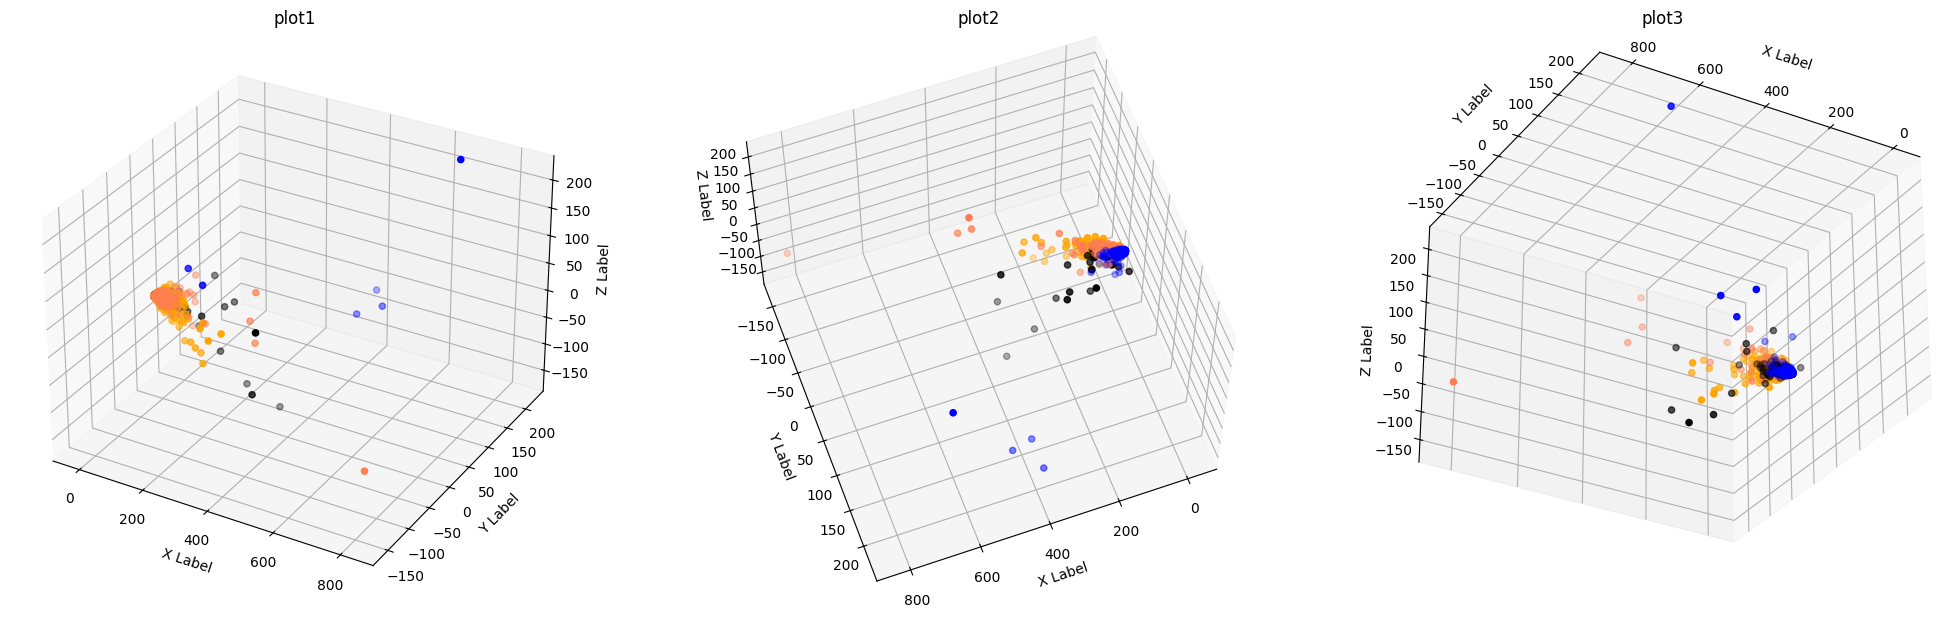

In [11]:
from sklearn.decomposition import PCA
X_reduced3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(131,projection = '3d')
ax2 = fig.add_subplot(132,projection = '3d')
ax3 = fig.add_subplot(133,projection = '3d')
for c, category in zip(col, categories):
    xs = X_reduced3D[X['category_name'] == category].T[0]
    ys = X_reduced3D[X['category_name'] == category].T[1]
    zs = X_reduced3D[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.set_title("plot1")

ax2.view_init(60, 70)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')
ax2.set_title("plot2")

ax3.view_init(-30, 60)
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')
ax3.set_title("plot3")

plt.show()

Comparing with 2D plots, 3D plots provides us more information to observe the characteristic of each categories.

**Exercise 13**

In [ ]:
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = px.bar(x=count_vect.get_feature_names_out()[
             :300], y=term_frequencies[:300], text=term_frequencies[:300], labels={'x': 'term', 'y': 'frequency'})
fig.update_layout(width=1200, height=500)
fig.update_xaxes(tickangle=90)
fig.show()


The output image.

![](plotEx13.png)

**Exercise 14**

I use the selected data in Exercise 11.

In [ ]:
term_frequencies2 = np.asarray(X_counts_2.sum(axis=0))[0]
fig = px.bar(x=count_vect_2.get_feature_names_out()[
             :], y=term_frequencies2, text=term_frequencies2, labels={'x': 'term', 'y': 'frequency'})
fig.update_layout(width=1200, height=500)
fig.update_xaxes(tickangle=90)
fig.show()

The output image.

![](plotEx14.png)

**Exercise 15**

In [ ]:
df = pd.DataFrame({'term': count_vect_2.get_feature_names_out()[:300],
                   'frequency': term_frequencies2[:300]})
df = df.sort_values(by='frequency', ascending=False)
fig = px.bar(df, x='term', y='frequency')
fig.update_layout(width=1200, height=500)
fig.update_xaxes(tickangle=90)
fig.show()

The output image.

![](plotEx15.png)

**Exercise 16**

It still works when we change to 'category_name' as classes.

In [46]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
